# Implementing Fourier Transforms
_Abhishek Chakraborty_

A look at how to implement Fourier Transforms on a computer.

## Discrete Fourier Transforms
Analytically, the Fourier Transform is used for continuous functions. However, when we want to implement things on a computer, discreteness naturally creeps in. 
Here we do the following:
1. Generate a discretely sampled signal.
2. Define a funcion to perform the DFT.
3. Regenerate the signal as verification.
4. Alter the DFT and see the result.

In [3]:
%pylab inline
import scipy.linalg as la

Populating the interactive namespace from numpy and matplotlib


### Generating the signal

First we generate a signal. For discrete fourier transforms,the signal is sampled at a finite number of points after regular intervals, which we attribute to the response time of the measuring apparatus. The number of samples is a power of 2 for reasons that will be clear later when we discuss the Fast Fourier Transform.

In [4]:
def signal(t):
    return 1-(t-2)**2 if (t<3 and t>1) else 0

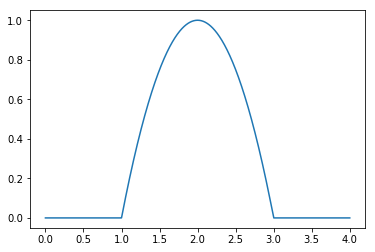

In [5]:
num_samples = rows = cols = 2**12
time_list  = linspace(0.0001,4,num_samples)
signal_list = [signal(time) for time in time_list]
plot(time_list,signal_list)

Now we create the function that will perform the discrete fourier transform.

In [6]:
def DFT(x,inverse=False):
    x = asarray(x,dtype=float)
    n = arange(num_samples)
    k = n.reshape((num_samples,1))        
    mat = exp(2j * pi * k *n/num_samples)
    return dot(la.inv(mat),x) if inverse else dot(mat,x)

A look into the mathematical treatment of the DFT should convince you that this is the way to go.

### Taking the Discrete Fourier Transform

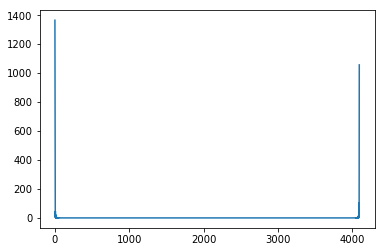

In [7]:
g = DFT(signal_list)
plot(absolute(g))

### Regenerating the signal

Regenerating the signal shouldn't be too difficult as it just involves the inverse of the matrix. We choose only the real part as the signal was initially also purely real.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


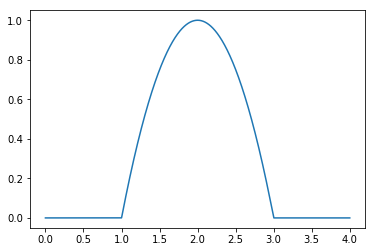

In [8]:
f = DFT(g,inverse=True)
plot(time_list,f.real)

This verifies that the DFT we obtained was correct.

### Editing the fourier transform

Let's play around with this now. It's obvious from the above plot that the major contributors are the first and last elements in the fourier transformed coefficients. So let's and see how that changes the signal

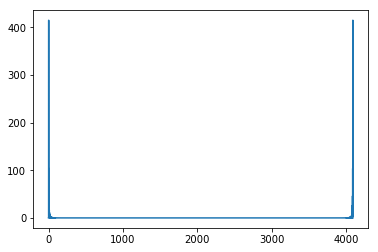

In [16]:
g[0] = g[-1] =  0
plot(absolute(g))

### Regenerating the modified signal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


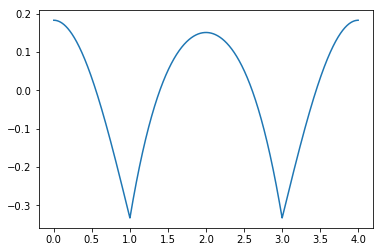

In [17]:
f = DFT(g,inverse=True)
plot(time_list,f.real)

Notice that the amplitude of the regenerated signal is a lot less than the original signal. This is attributed to the fact that when you take away the contributions due to certian frequencies, a lesser number of harmonics generate the new signal and this signal has a lower amplitude.

## Fast Fourier Transform

Discrete Fourier Transforms are great but they are also horribly slow, with a time complexity of $\mathcal{O}(n^2)$. For matrices that are large (i.e. a high sampling rate), this means it takes practically forever to perform a DFT. However, Given the nature of the matrix used to obtain the DFT, an optimization is possible. Let's use the same signal as before. 

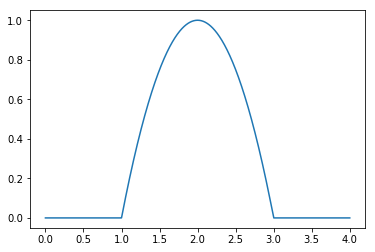

In [11]:
plot(time_list,signal_list)

We intend to use recursion as our friend in this one. So we'll define a function which implements this recursion. Why we define the function this particular way will be clear if you look at the mathematical treatment for the optimization of the FFT.

In [12]:
def FFT(x):
    x = asarray(x,dtype=float)
    N = x.shape[0]
    if N == 1:
        return x
    else:
        X_even = FFT(x[0::2])
        X_odd = FFT(x[1::2])
        factor = exp(-2j * pi * arange(N) / N)
        return concatenate([X_even + factor[:N / 2] * X_odd, X_even + factor[N / 2:] * X_odd])

### Taking the Fast Fourier Transform

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


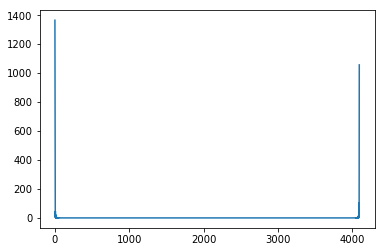

In [13]:
h = FFT(signal_list)
plot(absolute(h))

## Time Comparison


### Discrete Fourier Transform


In [14]:
%timeit DFT(signal_list) 

1 loop, best of 3: 2.15 s per loop


### Fast Fourier Transform

In [15]:
%timeit FFT(signal_list)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1 loop, best of 3: 104 ms per loop


The FFT is obviously faster than the DFT. It is still slower than the library functions as those are further optimized.
